In [ ]:
# Extracting features from a single cell
# Code written by A Siddharth Reddy

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import greycomatrix, greycoprops

In [ ]:
# Function to calculate local homogeneity
def calculate_local_homogeneity(gray_image, mask):
    # To calculate GLCM
    glcm = greycomatrix(gray_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

    # To calculate homogeneity
    homogeneity = greycoprops(glcm, 'homogeneity')

    return homogeneity[0, 0]

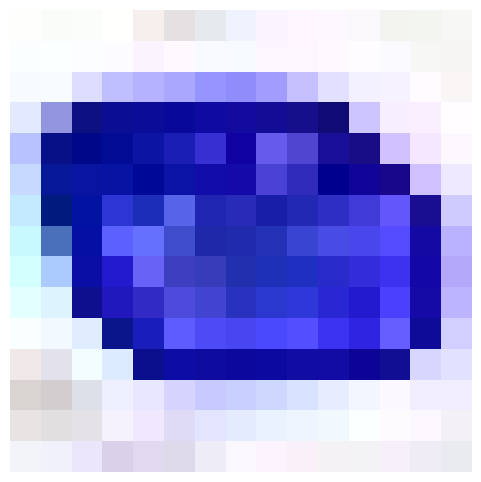

In [ ]:
# Loading the original image
image_path = '/content/test2.jpg'
original_image = cv2.imread(image_path)

# To display the original image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

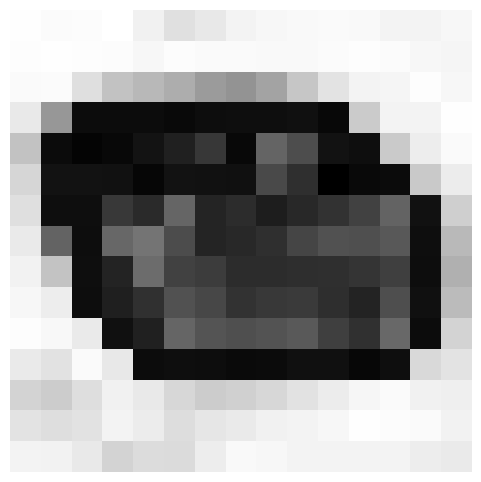

In [ ]:
# Converting the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()


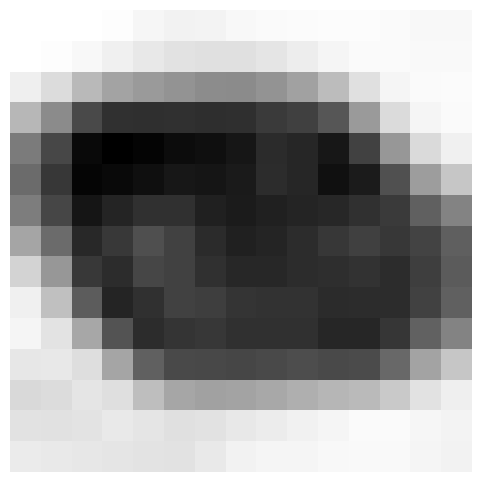

In [ ]:
# Applying Gaussian blur to the grayscale image
blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

# To display the blurred image
plt.figure(figsize=(6, 6))
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')
plt.show()

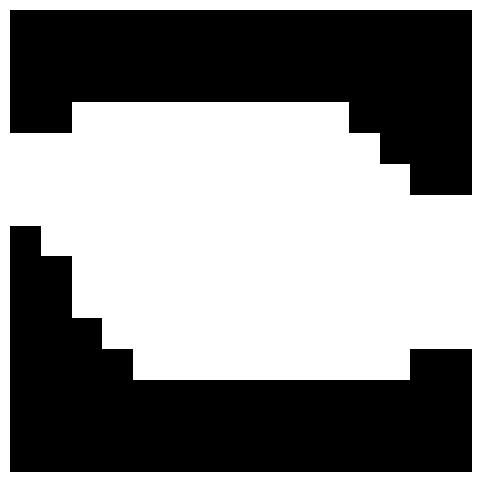

In [ ]:
# Applying thresholding to obtain a binary image
ret, binary_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# To display the binary image
plt.figure(figsize=(6, 6))
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

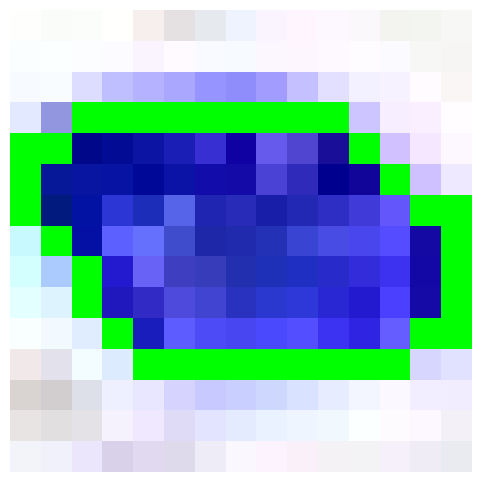

In [ ]:
# To find contours on the binary image
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Drawing the contours on the original image
contour_image = original_image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 1)

# Displaying the contour image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
# Cell Area: No of pixels within the detected contour.

######### To describe Shape #########
# Aspect Ratio: Ratio of the width to the height of the bounding rectangle of the detected contour.
  ## Bounding rectangle: A rectangle that completely encloses the contour.
# Extent:Ratio of the contour area to the area of its bounding rectangle. Measures how much of the bounding rectangle is filled by the contour.
# Solidity: Ratio of the contour area to the area of its convex hull. Convex hull is the smallest convex shape that can enclose the contour.

#Contrast: Standard deviation of the grayscale pixel values within the contour. Measures the variation in intensity values inside the contour.

In [ ]:
# Calculating the area, shape descriptors, and contrast for each contour
for contour in contours:
    # Area
    area = cv2.contourArea(contour)

    # Bounding rectangle
    x, y, w, h = cv2.boundingRect(contour)

    # Aspect ratio
    aspect_ratio = float(w) / h

    # Extent: Ratio of contour area to bounding rectangle area
    rect_area = w * h
    extent = float(area) / rect_area

    # Convex hull and solidity: Ratio of contour area to convex hull area
    hull = cv2.convexHull(contour)
    hull_area = cv2.contourArea(hull)
    solidity = float(area) / hull_area

    # Contrast: Standard deviation of grayscale pixel values inside the contour
    mask = np.zeros(gray_image.shape, np.uint8)
    cv2.drawContours(mask, [contour], -1, 255, -1)
    pixel_values = gray_image[mask == 255]
    contrast = np.std(pixel_values)

    # Local Homogeneity
    local_homogeneity = calculate_local_homogeneity(gray_image, mask)

    # Print the results
    print(f"Cell Area: {area}")
    print(f"")
    print(f"Aspect Ratio: {aspect_ratio}")
    print(f"Extent: {extent}")
    print(f"Solidity: {solidity}")
    print(f"")
    print(f"Contrast: {contrast}")
    print("")
    print(f"Local Homogeneity of the cell: {local_homogeneity}")
    print("")

    # Drawing bounding rectangle and convex hull on the contour image for visualization
    cv2.rectangle(contour_image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.drawContours(contour_image, [hull], -1, (0, 0, 255), 2)



Cell Area: 91.5

Aspect Ratio: 1.6666666666666667
Extent: 0.6777777777777778
Solidity: 0.9631578947368421

Contrast: 47.6494265573015

Local Homogeneity of the cell: 0.13310067716699156



/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


In [ ]:
from skimage.feature import greycomatrix, greycoprops

# Function to calculate local homogeneity
def calculate_local_homogeneity(gray_image, mask):
    # Calculate GLCM
    glcm = greycomatrix(gray_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

    # To calculate homogeneity
    homogeneity = greycoprops(glcm, 'homogeneity')

    return homogeneity[0, 0]

In [ ]:
mask = np.zeros(gray_image.shape, np.uint8)
cv2.drawContours(mask, [contour], -1, 255, -1)
pixel_values = gray_image[mask == 255]
contrast = np.std(pixel_values)

# Local Homogeneity
local_homogeneity = calculate_local_homogeneity(gray_image, mask)

# Printing the results
print(f"Contour Area: {area}")
print(f"Aspect Ratio: {aspect_ratio}")
print(f"Extent: {extent}")
print(f"Solidity: {solidity}")
print(f"Contrast: {contrast}")
print(f"Local Homogeneity: {local_homogeneity}")
print("")

Contour Area: 91.5
Aspect Ratio: 1.6666666666666667
Extent: 0.6777777777777778
Solidity: 0.9631578947368421
Contrast: 47.6494265573015
Local Homogeneity: 0.13310067716699156



/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
